<a href="https://colab.research.google.com/github/tombresee/DATACAMP_UML/blob/master/ENTER/notebooks/L3_Decorrelating_data_and_dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/ML-Challenge/week4-unsupervised-learning/blob/master/L3.Decorrelating%20data%20and%20dimension%20reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>

Dimension reduction summarizes a dataset using its common occuring patterns. In this lesson, we'll learn about the most fundamental of dimension reduction techniques, "Principal Component Analysis" ("PCA"). PCA is often used before supervised learning to improve model performance and generalization. It can also be useful for unsupervised learning. For example, we'll employ a variant of PCA that will allow us to cluster Wikipedia articles by their content!

# Setup

In [1]:
# Download lesson datasets
# Required if you're using Google Colab
!wget "https://github.com/ML-Challenge/week4-unsupervised-learning/raw/master/datasets.zip"
!unzip -o datasets.zip

--2020-09-26 00:13:48--  https://github.com/ML-Challenge/week4-unsupervised-learning/raw/master/datasets.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ML-Challenge/week4-unsupervised-learning/master/datasets.zip [following]
--2020-09-26 00:13:49--  https://raw.githubusercontent.com/ML-Challenge/week4-unsupervised-learning/master/datasets.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2227561 (2.1M) [application/zip]
Saving to: ‘datasets.zip’

datasets.zip        100%[===================>]   2.12M  9.71MB/s    in 0.2s    

2020-09-26 00:13:49 (9.71 MB/s) - ‘datasets.zip’ saved [2227561/2227

In [2]:
# Import utils
# We'll be using this module throughout the lesson
import utils

In [3]:
# Import dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# and setting the size of all plots.
plt.rcParams['figure.figsize'] = [11, 7]

# Visualizing the PCA transformation

In the next two lessons we'll learn techniques for dimension reduction.

## Dimension reduction

Dimension reduction finds patterns in data, and uses these patterns to re-express it in a compressed form. This makes subsequent computation with the data much more efficient, and this can be a big deal in a world of big datasets. However, the most important function of dimension reduction is to reduce a dataset to its bare bones, discarding noisy features that cause big problems for supervised learning tasks like regression and classification. In many real-world applications, it's dimension reduction that makes prediction possible.

## Principal Component Analysis

In this lesson, we'll learn about the most fundamental of dimension reduction techniques. It's called Principal Component Analysis, or `PCA` for short. PCA performs dimension reduction in two steps, and the first one, called de-correlation, doesn't change the dimension of the data at all. It's this first step that we'll focus on next.

In this first step, PCA rotates the samples so that they are aligned with the coordinate axes. In fact, it does more than this: PCA also shifts the samples so that they have mean zero. These scatter plots show the effect of PCA applied to two features of the wine dataset.

![PCA](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/3-1.png?raw=1)

Notice that no information is lost - this is true no matter how many features our dataset has.

`scikit-learn` has an implementation of PCA, and it has fit and transform methods just like StandardScaler: 

* The `fit` method learns how to shift and how to rotate the samples, but doesn't actually change them. 
* The `transform` method, on the other hand, applies the transformation that fit learned. In particular, the transform method can be applied to new, unseen samples.

## Using scikit-learn PCA

Let's see PCA in action on the some features of the wine dataset. Firstly, import PCA.

```
from sklearn.decomposition import PCA
```

Now create a PCA object, and fit it to the samples.

```
model = PCA()
model.fit(utils.wine)
```

Then use the fit PCA object to transform the samples. This returns a new array of transformed samples.

```
transformed = model.transform(utils.wine)
```

## PCA features

This new array has the same number of rows and columns as the original sample array. In particular, there is one row for each transformed sample. The columns of the new array correspond to `PCA features`, just as the original features corresponded to columns of the original array.

It is often the case that the features of a dataset are correlated. This is the case with many of the features of the wine dataset, for instance. However, PCA, due to the rotation it performs, de-correlates the data, in the sense that the columns of the transformed array are not linearly correlated.

## Pearson correlation

Linear correlation can be measured with the Pearson correlation. It takes values between -1 and 1, where larger values indicate a stronger correlation, and 0 indicates no linear correlation. Here are some examples of features with varying degrees of correlation.

![Decorrelated](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/3-2.png?raw=1)

## Principal components

Finally, PCA is called principal component analysis because it learns the principal components of the data. These are the directions in which the samples vary the most, depicted here in red. 

![PCs](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/3-3.png?raw=1)

It is the principal components that PCA aligns with the co-ordinate axes. After a PCA model has been fit, the principal components are available as the `components_` attribute. This is numpy array with one row for each principal component.

## Correlated data in nature

We have an array of grains giving the width and length of samples of grain. We suspect that width and length will be correlated. To confirm this, let's make a scatter plot of width vs length and measure their Pearson correlation.

In [4]:
# Perform the necessary imports
from scipy.stats import pearsonr

In [5]:
# Assign the 0th column of grains: width
width = utils.grains[:,0]

In [6]:
# Assign the 1st column of grains: length
length = utils.grains[:,1]

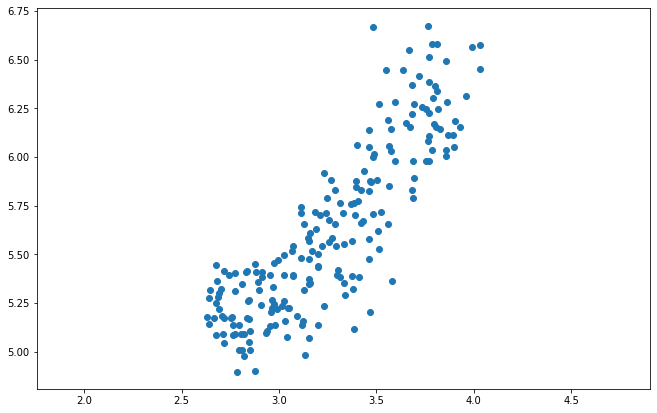

In [7]:
# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

In [8]:
# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

In [9]:
# Display the correlation
print(correlation)

0.8604149377143466


As we would expect, the width and length of the grain samples are highly correlated.

## Decorrelating the grain measurements with PCA

We observed in the previous example that the width and length measurements of the grain are correlated. Now, we'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

In [10]:
# Import PCA
from sklearn.decomposition import PCA

In [11]:
# Create PCA instance: model
model = PCA()

In [12]:
# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(utils.grains)

In [13]:
# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

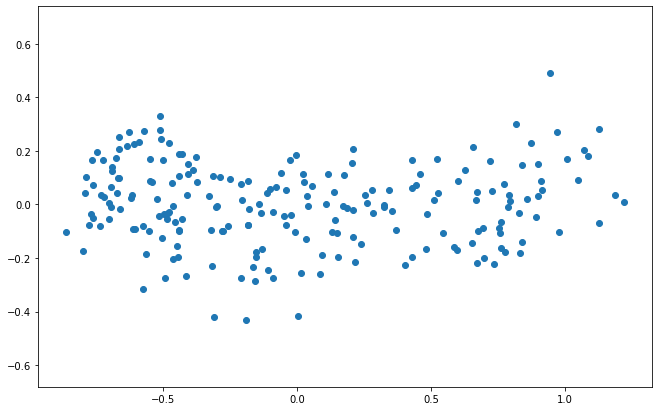

In [14]:
# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

In [15]:
# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

2.5478751053409354e-17


Excellent! We've successfully decorrelated the grain measurements with PCA!

# Intrinsic dimension

Consider a dataset with two features: `latitude` and `longitude`. These two features might track the flight of an airplane, for example. This dataset is two dimensional, yet it turns out that it can be closely approximated using only one feature: the displacement along the flight path. This dataset is intrinsically one dimensional.

![Flight Path](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/3-4.png?raw=1)

The intrinsic dimension of a dataset is the number of features required to approximate it. The intrinsic dimension informs dimension reduction, because it tells us how much a dataset can be compressed.

Next, we'll gain a solid understanding of the intrinsic dimension, and be able to use PCA to identify it in real-world datasets that have thousands of features.

To better illustrate the intrinsic dimension, let's consider an example dataset containing only some of the samples from the iris dataset. Specifically, let's take three measurements from the iris versicolor samples: `sepal length`, `sepal width`, and `petal width`. So each sample is represented as a point in 3-dimensional space.

However, if we make a 3d scatter plot of the samples, we see that they all lie very close to a flat, 2-dimensional sheet. This means that the data can be approximated by using only two co-ordinates, without losing much information. So this dataset has intrinsic dimension 2.

![3D Scatter](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/3-5.png?raw=1)

But scatter plots are only possible if there are 3 features or less. So how can the intrinsic dimension be identified, even if there are many features?

This is where PCA is really helpful. The intrinsic dimension can be identified by counting the PCA features that have high variance. To see how, let's see what happens when PCA is applied to the dataset of versicolor samples.

![PCA 3D](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/3-6.png?raw=1)

PCA rotates and shifts the samples to align them with the co-ordinate axes. This expresses the samples using three PCA features.

The PCA features are in a special order. Here is a bar graph showing the variance of each of the PCA features.

![PCA Bar](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/3-7.png?raw=1)

As we can see, each PCA feature has less variance than the last, and in this case the last PCA feature has very low variance. This agrees with the scatter plot of the PCA features, where the samples don't vary much in the vertical direction. In the other two directions, however, the variance is apparent.

The intrinsic dimension is the number of PCA features that have significant variance. In our example, only the first two PCA features have significant variance. So this dataset has intrinsic dimension 2, which agrees with what we observed when inspecting the scatter plot.

![PCA Reduction](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/3-8.png?raw=1)

Let's see how to plot the variances of the PCA features in practice. Firstly, make the necessary imports.

```
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
```

Then create a PCA model, and fit it to the samples.

```
pca = PCA()
pca.fit(samples)
```

Now create a range enumerating the PCA features,

```
features = range(pca.n_components_)
```

and make a bar plot of the variances; the variances are available as the `explained_variance_` attribute of the PCA model.

```
plt.bar(features, pca.explained_variance_)

plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')

plt.show()
```

The intrinsic dimension is a useful idea that helps to guide dimension reduction. However, it is not always unambiguous. Here is a graph of the variances of the PCA features for the wine dataset.

![Wine PCA](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/3-9.png?raw=1)

We could argue for an intrinsic dimension of 2, of 3, or even more, depending upon the threshold we chose. In the next section, we'll learn to use the intrinsic dimension for dimension reduction.

## The first principal component

The first principal component of the data is the direction in which the data varies the most. In this example, our job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

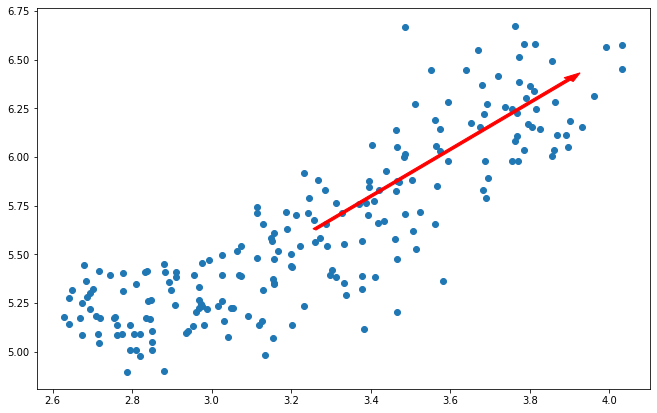

In [16]:
# Make a scatter plot of the untransformed points
plt.scatter(width, length)

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(utils.grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
#plt.axis('equal')
plt.show()

This is the direction in which the grain data varies the most.

## Variance of the PCA features

The fish dataset is 6-dimensional. But what is its intrinsic dimension? Let's make a plot of the variances of the PCA features to find out. As before, `fish_samples` is a 2D array, where each row represents a fish. We'll need to standardize the features first.

In [17]:
# Perform the necessary imports
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [18]:
# Create scaler: scaler
scaler = StandardScaler()

In [19]:
# Create a PCA instance: pca
pca = PCA()

In [20]:
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

In [21]:
# Fit the pipeline to 'samples'
pipeline.fit(utils.fish_samples)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

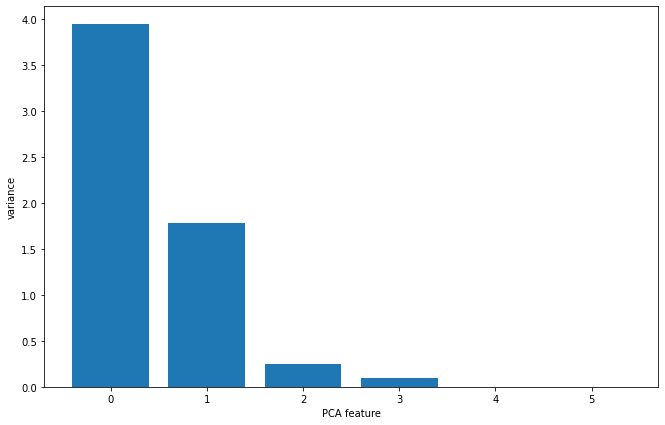

In [22]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

 It looks like PCA features 0 and 1 have significant variance.

# Dimension reduction with PCA

Dimension reduction represents the same data using less features and is vital for building machine learning pipelines using real-world data. Finally, in this lesson, we'll learn how to perform dimension reduction using PCA.

We've seen already that the PCA features are in decreasing order of variance. PCA performs dimension reduction by discarding the PCA features with lower variance, which it assumes to be noise, and retaining the higher variance PCA features, which it assumes to be informative.

To use PCA for dimension reduction, we need to specify how many PCA features to keep. For example, specifying `n_components=2` when creating a PCA model tells it to keep only the first two PCA features. A good choice is the intrinsic dimension of the dataset, if we know it. Let's consider the following example.

The iris dataset has 4 features representing the 4 measurements. Here, the measurements are in a numpy array called `samples`. Let's use PCA to reduce the dimension of the iris dataset to only 2. Begin by importing PCA as usual.

```
from sklearn.decomposition import PCA
```

Create a PCA model specifying `n_components=2`, and then fit the model and transform the samples as usual.

```
pca = PCA(n_components=2)

pca.fit(samples)
transformed = pca.transform(samples)
```

Here is a scatterplot of the two PCA features, where the colors represent the three species of iris.

![Iris PCA](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/3-14.png?raw=1)

Remarkably, despite having reduced the dimension from 4 to 2, the species can still be distinguished. Remember that PCA didn't even know that there were distinct species. PCA simply took the 2 PCA features with highest variance. As we can see, these two features are very informative.

PCA discards the low variance features, and assumes that the higher variance features are informative. Like all assumptions, there are cases where this doesn't hold. As we saw with the iris dataset, however, it often does in practice.

## Word frequency arrays

In some cases, an alternative implementation of PCA needs to be used. Word frequency arrays are a great example. In a word-frequency array, each row corresponds to a document, and each column corresponds to a word from a fixed vocabulary. The entries of the word-frequency array measure how often each word appears in each document.

![Word Frequency Array](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/3-13.png?raw=1)

Only some of the words from the vocabulary appear in any one document, so most entries of the word frequency array are zero. Arrays like this are said to be sparse, and are often represented using a special type of array called a `csr_matrix`.

`csr_matrices` save space by remembering only the non-zero entries of the array. Scikit-learn's PCA doesn't support csr_matrices, and we'll need to use `TruncatedSVD` instead. `TruncatedSVD` performs the same transformation as PCA, but accepts csr matrices as input. Other than that, we interact with `TruncatedSVD` and PCA in exactly the same way.

## Dimension reduction of the fish measurements

In the previous example, we saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now let's use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

In [23]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

In [24]:
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

In [25]:
# Fit the pipeline to 'samples'
pipeline.fit(utils.fish_samples)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [26]:
# Transform the scaled samples: pca_features
pca_features = pipeline.transform(utils.fish_samples)

In [27]:
# Print the shape of pca_features
print(utils.fish_samples.shape)
print(pca_features.shape)

(85, 6)
(85, 2)


Superb! We've successfully reduced the dimensionality from 6 to 2.

## A tf-idf word-frequency array

In this example, we'll create a tf-idf word frequency array for a toy collection of documents. For this, we use the `TfidfVectorizer` from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a `csr_matrix`. It has `fit()` and `transform()` methods like other sklearn objects.

In [28]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [29]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

In [31]:
# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

In [32]:
# Print result of toarray() method
print(csr_mat.toarray())

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]


In [33]:
# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


## Clustering Wikipedia part I

We saw that `TruncatedSVD` is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Let's combine our knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this example, we build the pipeline. In the next example, we'll apply it to the word-frequency array of some Wikipedia articles.

Let's create a Pipeline object consisting of a TruncatedSVD followed by KMeans. The word-frequency matrix is already computed, so there's no need for a `TfidfVectorizer`).

The Wikipedia dataset we'll be working with was obtained from [here](https://blog.lateral.io/2015/06/the-unknown-perils-of-mining-wikipedia/).

In [34]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

In [35]:
# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

In [36]:
# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

In [37]:
# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

## Clustering Wikipedia part II

It is now time to put our pipeline from the previous example to work! We have an array `articles` of tf-idf word-frequencies of some popular Wikipedia articles, and a list `titles` of their titles. Let's use the pipeline to cluster the Wikipedia articles.

In [38]:
# Fit the pipeline to articles
pipeline.fit(utils.articles)

Pipeline(memory=None,
         steps=[('truncatedsvd',
                 TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
                              random_state=None, tol=0.0)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=6, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [39]:
# Calculate the cluster labels: labels
labels = pipeline.predict(utils.articles)

In [40]:
# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': utils.titles})

In [41]:
# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
36      0              2014 FIFA World Cup qualification
30      0                  France national football team
31      0                              Cristiano Ronaldo
32      0                                   Arsenal F.C.
33      0                                 Radamel Falcao
34      0                             Zlatan Ibrahimović
39      0                                  Franck Ribéry
38      0                                         Neymar
37      0                                       Football
35      0                Colombia national football team
18      1  2010 United Nations Climate Change Conference
17      1  Greenhouse gas emissions by the United States
16      1                                        350.org
15      1                                 Kyoto Protocol
14      1                                 Climate change
12      1                                   Nigel Lawson
11      1       Nationally Appr

---
**[Week 4 - Unsupervised Learning](https://radu-enuca.gitbook.io/ml-challenge/unsupervised-learning)**

*Have questions or comments? Visit the ML Challenge Mattermost Channel.*